In [ ]:
## pip install umap
## conda install umap

#### I recommend creating a virtual environment before using new packages to avoid
#### conflict between package versions


## resource - https://umap-learn.readthedocs.io/en/latest/basic_usage.html

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set(style='white', context='notebook', rc={'figure.figsize':(6,4)})

In [ ]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins.head()
# print(len(penguins))

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguins = penguins.dropna()
penguins.species_short.value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species_short, dtype: int64

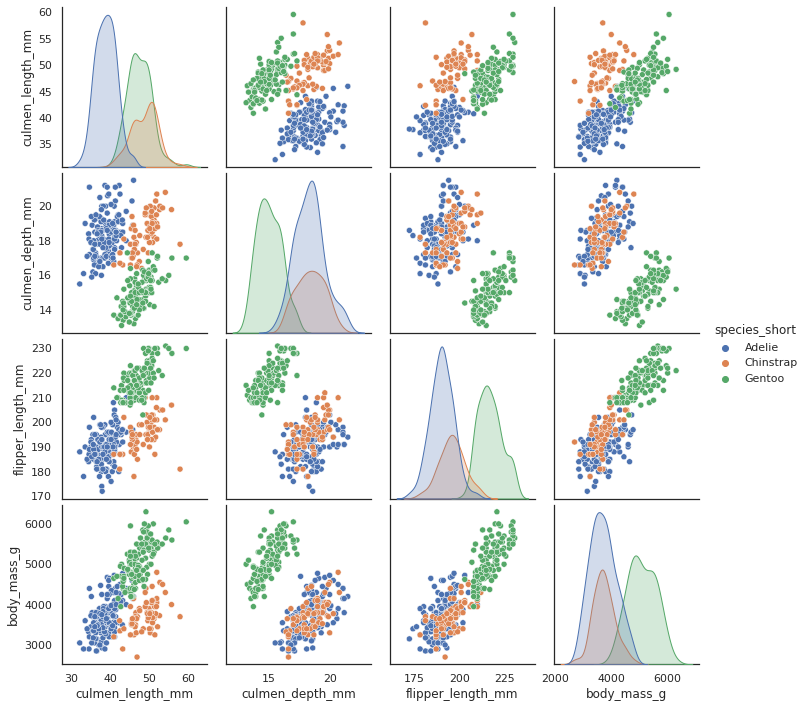

In [ ]:
sns.pairplot(penguins, hue='species_short')

In [ ]:
import umap

In [ ]:
reducer = umap.UMAP()

# reducer2 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
#      force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
#      local_connectivity=1.0, low_memory=False, metric='euclidean',
#      metric_kwds=None, min_dist=0.6, n_components=2, n_epochs=None,
#      n_neighbors=25, negative_sample_rate=5, output_metric='euclidean',
#      output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
#      set_op_mix_ratio=1.0, spread=4.0, target_metric='categorical',
#      target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
#      transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

https://umap-learn.readthedocs.io/en/latest/parameters.html

In [ ]:
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values

scaled_penguin_data = StandardScaler().fit_transform(penguin_data)


In [ ]:
scaled_penguin_data.shape

(334, 4)

In [ ]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual fea

In [ ]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

(334, 2)

Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

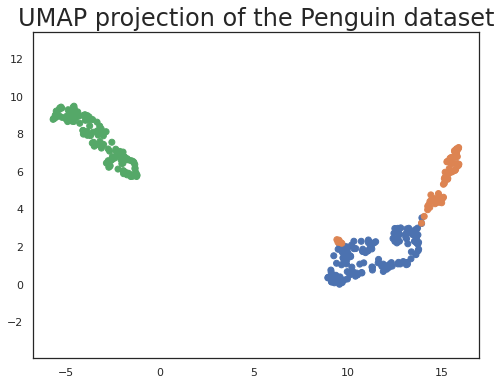

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

## Node2vec

 - Is a Graph Embedding Algorithm
 - why we need it ?

 #### paper - https://arxiv.org/abs/1607.00653

## Fundamentals

 - works on the word2vec Skip Gram model
 - The only difference is that here instead of word vectors you have node vectors to feed into the SKIP Gram model

#### Schematic of the algo

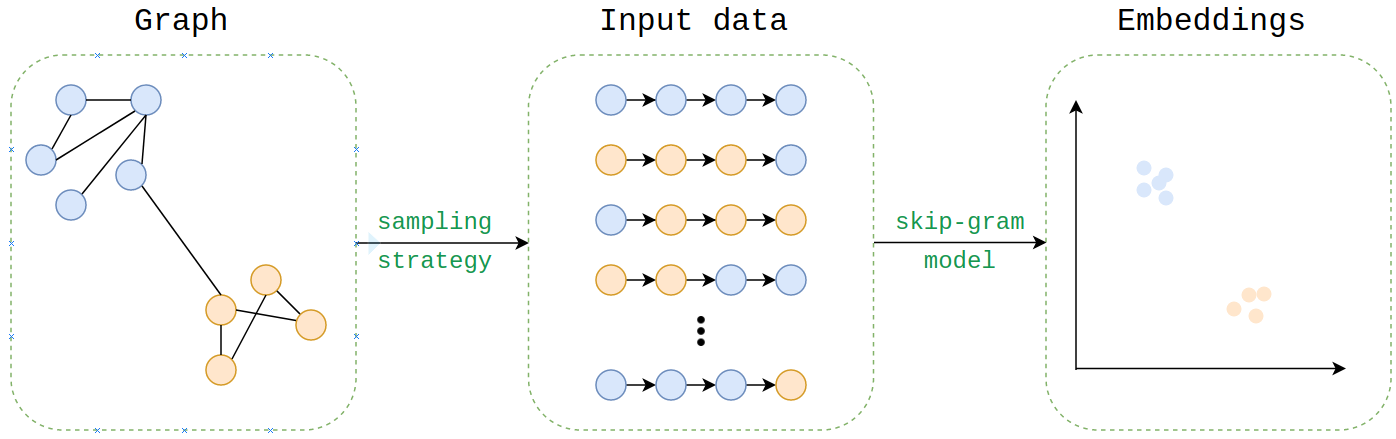

In [ ]:
from IPython.display import Image
Image(filename= "node2vec2.png", width=900, height=500)

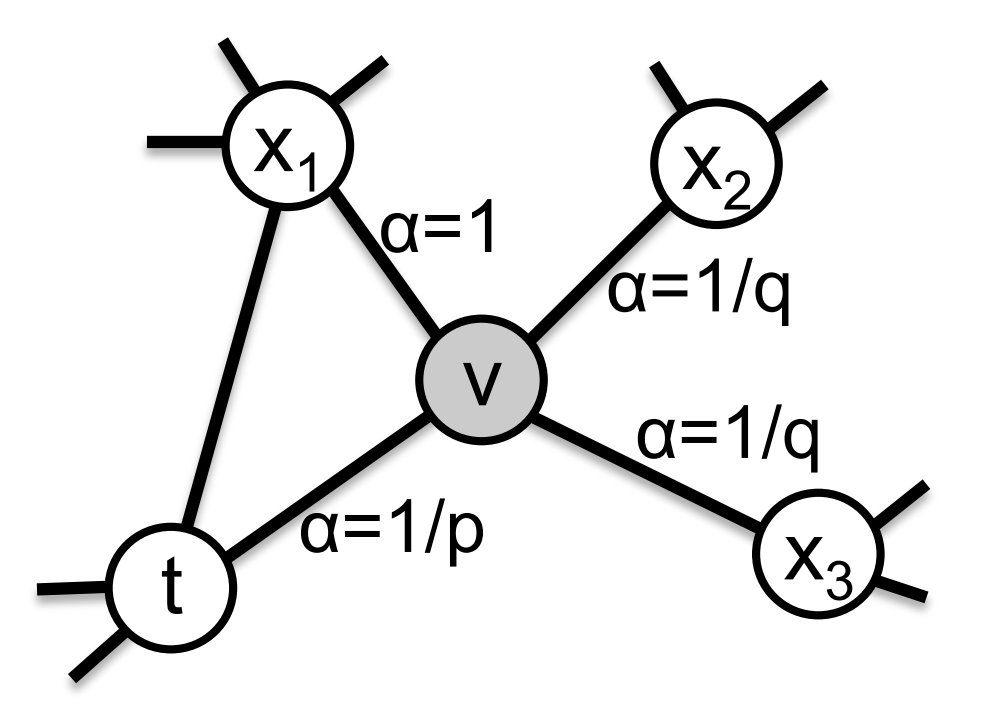

In [ ]:
Image(filename= "node2vec.png", width=600, height=400)

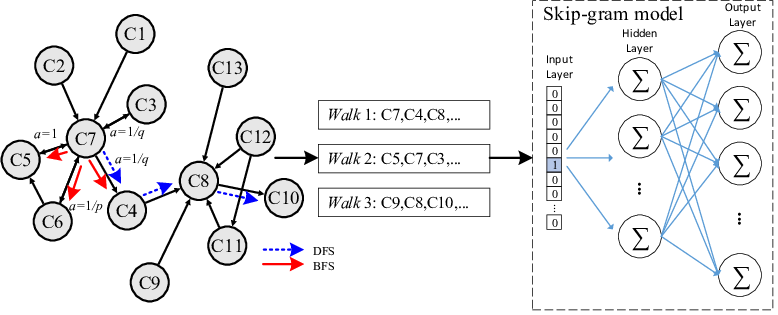

In [ ]:
Image(filename= "node2vec3.png", width=900, height=500)

In [ ]:
import networkx as nx
import nodevectors

## Let's try our own

In [ ]:
## We will use a known social network

import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G = nx.generators.social.les_miserables_graph()

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
comms = list(greedy_modularity_communities(G))

In [ ]:
sorted(comms)

[frozenset({'Brevet',
            'Champmathieu',
            'Champtercier',
            'Chenildieu',
            'Cochepaille',
            'Count',
            'CountessDeLo',
            'Cravatte',
            'Fauchelevent',
            'Geborand',
            'Gervais',
            'Gribier',
            'Isabeau',
            'Judge',
            'Labarre',
            'Marguerite',
            'MlleBaptistine',
            'MmeDeR',
            'MmeMagloire',
            'MotherInnocent',
            'Myriel',
            'Napoleon',
            'OldMan',
            'Scaufflaire',
            'Valjean',
            'Woman1'}),
 frozenset({'Bahorel',
            'Bossuet',
            'Child1',
            'Child2',
            'Combeferre',
            'Courfeyrac',
            'Enjolras',
            'Feuilly',
            'Gavroche',
            'Grantaire',
            'Joly',
            'Jondrette',
            'Mabeuf',
            'MmeBurgon',
            'MmeHuchelou

In [ ]:
## you can use color brewer for creating colors

color_pallette = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0']


ncolor = {}
for n in G.nodes:

    if n in comms[0]:
        ncolor[n] = (color_pallette[0])
    if n in comms[1]:
        ncolor[n] = (color_pallette[1])
    if n in comms[2]:
        ncolor[n] = (color_pallette[2])
    if n in comms[3]:
        ncolor[n] = (color_pallette[3])
    if n in comms[4]:
        ncolor[n] = (color_pallette[4])


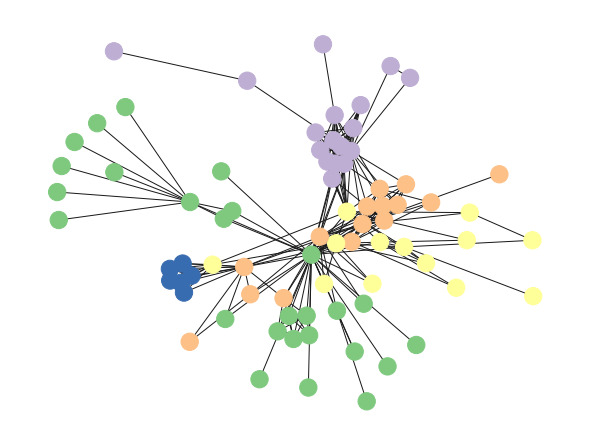

In [ ]:
nx.draw(G,node_color=ncolor.values())

https://github.com/VHRanger/nodevectors

In [ ]:
from nodevectors import Node2Vec

features = 15

# Fit embedding model to graph
g2v = Node2Vec(
    n_components=features,neighbor_weight=2,return_weight=1,
    walklen=20
)


nodeVector_embed = g2v.fit(G)

Making walks... Done, T=0.24
Mapping Walk Names... Done, T=0.03
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=0.31


In [ ]:
M = np.zeros((len(G.nodes),features))

for i,n in enumerate(G.nodes()):
    M[i][:] = g2v.predict(n)

In [ ]:
u = umap.UMAP(n_components=2, min_dist=0.8,n_neighbors=15)
pos = u.fit_transform(M)

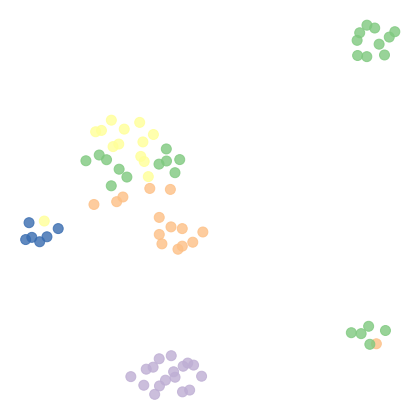

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.scatter(pos[:,0], pos[:,1], s=100,alpha=0.8,color=list(ncolor.values()))
plt.axis('off')
plt.tight_layout()

In [ ]:
pos.shape

(77, 2)

In [ ]:
len(ncolor)

77